In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Loading Functions

In [2]:
def loadNLP(folder, name):
    file = 'nlp/scenario_1/%s/%s.npy' % (folder, name)
    return np.load(file)

In [3]:
def loadData(folder):
    X_train = loadNLP(folder, 'train')
    y_train = loadNLP('labels', 'train')
    
    X_test = loadNLP(folder, 'test')
    y_test = loadNLP('labels', 'test')
    
    train = [X_train, y_train]
    test = [X_test, y_test]
    
    return train, test

# Load Data

In [4]:
train_uni, test_uni = loadData('unigram')

In [5]:
train_tfu, test_tfu = loadData('unigram_tfidf')

In [6]:
train_big, test_big = loadData('bigram')

In [7]:
train_tfb, test_tfb = loadData('bigram_tfidf')

In [8]:
train_runi, test_runi = loadData('reduced_unigram')

In [9]:
train_rtfu, test_rtfu = loadData('reduced_unigram_tfidf')

In [10]:
train_rbig, test_rbig = loadData('reduced_bigram')

In [11]:
train_rtfb, test_rtfb = loadData('reduced_bigram_tfidf')

# Define Machine Learning Classifier Functions

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [15]:
def genClassifiers():

    classifiers = [LogisticRegression(), RandomForestClassifier()]
    names = ['Logistic Regression', 'Random Forest']
    
    return classifiers, names

In [18]:
def evalClassifiers(train, test):
    
    clf_array, clf_names = genClassifiers()
    
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    for i in range(0, len(clf_array)):
        start = time.time()
        clf_array[i].fit(X_train, y_train)
        end = time.time() - start
        
        y_pred = clf_array[i].predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        print(clf_names[i] + ': Completed in ' + str(end) + ' seconds')
        print(clf_names[i] + ' Accuracy: ' + str(accuracy))
        print(clf_names[i] + ' ROC AUC Score: ' + str(roc_auc))
        print(clf_names[i] + ' F Score: ' + str(f_score))
        print(clf_names[i] + ' Precision: ' + str(precision))
        print(clf_names[i] + ' Recall: ' + str(recall))
        print(" ")

# Evaluate Classifiers

## Unigram Classifiers

In [19]:
evalClassifiers(train_uni, test_uni)

Logistic Regression: Completed in 0.905487060546875 seconds
Logistic Regression Accuracy: 0.9208885424785659
Logistic Regression ROC AUC Score: 0.9191194013136433
Logistic Regression F Score: 0.913946587537092
Logistic Regression Precision: 0.9531388152077808
Logistic Regression Recall: 0.8778501628664495
 
Random Forest: Completed in 7.9485251903533936 seconds
Random Forest Accuracy: 0.897116134060795
Random Forest ROC AUC Score: 0.8950186967762668
Random Forest F Score: 0.887275832621691
Random Forest Precision: 0.9326750448833034
Random Forest Recall: 0.8460912052117264
 


## Unigram-Tfidf Classifiers

In [20]:
evalClassifiers(train_tfu, test_tfu)

Logistic Regression: Completed in 0.6392960548400879 seconds
Logistic Regression Accuracy: 0.9181605611847233
Logistic Regression ROC AUC Score: 0.9156332315722333
Logistic Regression F Score: 0.9092480553154711
Logistic Regression Precision: 0.9686924493554327
Logistic Regression Recall: 0.8566775244299675
 
Random Forest: Completed in 8.965252161026001 seconds
Random Forest Accuracy: 0.8936087295401403
Random Forest ROC AUC Score: 0.8912203054780581
Random Forest F Score: 0.8825806451612903
Random Forest Precision: 0.935278030993619
Random Forest Recall: 0.8355048859934854
 


## Bigram Classifiers

In [21]:
evalClassifiers(train_big, test_big)

Logistic Regression: Completed in 12.277153968811035 seconds
Logistic Regression Accuracy: 0.7798129384255651
Logistic Regression ROC AUC Score: 0.7721269530584324
Logistic Regression F Score: 0.7204354280059377
Logistic Regression Precision: 0.9180327868852459
Logistic Regression Recall: 0.5928338762214984
 
Random Forest: Completed in 157.38293194770813 seconds
Random Forest Accuracy: 0.7735775526110679
Random Forest ROC AUC Score: 0.7659135614924312
Random Forest F Score: 0.71280276816609
Random Forest Precision: 0.9069182389937107
Random Forest Recall: 0.5871335504885994
 


## Bigram-Tfidf Classifiers

In [22]:
evalClassifiers(train_tfb, test_tfb)

Logistic Regression: Completed in 3.684735059738159 seconds
Logistic Regression Accuracy: 0.7821512081060016
Logistic Regression ROC AUC Score: 0.7744360536169013
Logistic Regression F Score: 0.7231302625061912
Logistic Regression Precision: 0.922882427307206
Logistic Regression Recall: 0.5944625407166124
 
Random Forest: Completed in 154.52473211288452 seconds
Random Forest Accuracy: 0.7673421667965705
Random Forest ROC AUC Score: 0.7601353325250874
Random Forest F Score: 0.7089224768405656
Random Forest Precision: 0.8833535844471446
Random Forest Recall: 0.5920195439739414
 


## Reduced Unigram Classifiers

In [23]:
evalClassifiers(train_runi, test_runi)

Logistic Regression: Completed in 1.2681078910827637 seconds
Logistic Regression Accuracy: 0.720966484801247
Logistic Regression ROC AUC Score: 0.721390037150105
Logistic Regression F Score: 0.714968152866242
Logistic Regression Precision: 0.6993769470404985
Logistic Regression Recall: 0.7312703583061889
 
Random Forest: Completed in 1.966597080230713 seconds
Random Forest Accuracy: 0.6722525331254872
Random Forest ROC AUC Score: 0.671029856414601
Random Forest F Score: 0.6523356758991318
Random Forest Precision: 0.6624685138539043
Random Forest Recall: 0.6425081433224755
 


## Reduced Unigram-Tfidf Classifiers

In [24]:
evalClassifiers(train_rtfu, test_rtfu)

Logistic Regression: Completed in 0.6503212451934814 seconds
Logistic Regression Accuracy: 0.61730319563523
Logistic Regression ROC AUC Score: 0.6250006086190192
Logistic Regression F Score: 0.6680189317106154
Logistic Regression Precision: 0.5710982658959538
Logistic Regression Recall: 0.8045602605863192
 
Random Forest: Completed in 2.0365710258483887 seconds
Random Forest Accuracy: 0.6087295401402962
Random Forest ROC AUC Score: 0.6166789607708525
Random Forest F Score: 0.6624075319435104
Random Forest Precision: 0.5641466208476518
Random Forest Recall: 0.8021172638436482
 


## Reduced Bigram Classifiers

In [25]:
evalClassifiers(train_rbig, test_rbig)

Logistic Regression: Completed in 3.6409080028533936 seconds
Logistic Regression Accuracy: 0.5701480904130943
Logistic Regression ROC AUC Score: 0.561272719747983
Logistic Regression F Score: 0.44095286365940195
Logistic Regression Precision: 0.5838926174496645
Logistic Regression Recall: 0.3542345276872964
 
Random Forest: Completed in 4.195857048034668 seconds
Random Forest Accuracy: 0.5869056897895557
Random Forest ROC AUC Score: 0.58068888369534
Random Forest F Score: 0.5023474178403756
Random Forest Precision: 0.5931263858093127
Random Forest Recall: 0.43566775244299677
 


## Reduced Bigram-Tfidf Classifiers

In [26]:
evalClassifiers(train_rtfb, test_rtfb)

Logistic Regression: Completed in 2.223891019821167 seconds
Logistic Regression Accuracy: 0.5545596258768511
Logistic Regression ROC AUC Score: 0.5481995832176957
Logistic Regression F Score: 0.4621176470588235
Logistic Regression Precision: 0.5473801560758083
Logistic Regression Recall: 0.3998371335504886
 
Random Forest: Completed in 5.023006916046143 seconds
Random Forest Accuracy: 0.5978176149649259
Random Forest ROC AUC Score: 0.5928594382203006
Random Forest F Score: 0.5317604355716878
Random Forest Precision: 0.6004098360655737
Random Forest Recall: 0.4771986970684039
 


# Define Neural Network Functions

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
def DNN(train, test, iterations = 50, early_stop = False, info = 0):
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    dim = len(X_train[0])
    
    model = models.Sequential()
    if dim >= 40000:
        model.add(layers.Dense(500, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(128, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(32, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    elif dim >= 9000:
        model.add(layers.Dense(200, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(64, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))        
    elif dim >= 1000:
        model.add(layers.Dense(100, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    else:
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim, )))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.summary()
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    start = time.time()
    
    callback = [EarlyStopping(monitor = 'val_loss', min_delta = .0001)]
    if early_stop:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            callbacks = callback,
                            validation_data = (X_test, y_test))
    else:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            validation_data = (X_test, y_test))
        
    end = time.time() - start
    
    test_vals = model.evaluate(X_test, y_test)
    
    print("Training Time:  ", end)
    print("Model Loss:     ", test_vals[0])
    print("Model Accuracy: ", test_vals[1])
    
    return model, history

In [34]:
def plotFigures(hist, epoch_range):
    
    training_loss = hist.history['loss']
    training_acc = hist.history['accuracy']
    
    validation_loss = hist.history['val_loss']
    validation_acc = hist.history['val_accuracy']
    
    epochs = range(1, epoch_range + 1)
    
    f = plt.figure(1)
    plt.title("Training and Validation Loss")
    plt.plot(epochs, training_loss, 'r', label = 'Training Loss')
    plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    g = plt.figure(2)
    plt.title("Training and Validation Accuracy")
    plt.plot(epochs, training_acc, 'r', label = 'Training Acc')
    plt.plot(epochs, validation_acc, 'b', label = 'Validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [35]:
def evaluate(model, history, test, name):
    X_test = test[0]
    y_test = test[1]
    epoch_range = len(history.history['loss'])
    
    pred_sigmoid = model.predict(X_test)
    pred = []
    for p in pred_sigmoid:
        if p < .5:
            pred.append(0)
        else:
            pred.append(1)
    y_pred = np.asarray(pred)
    
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(name + ' Evaluation: ')
    print('Accuracy:       ', acc)
    print('ROC AUC Score:  ', roc_auc)
    print('F1 Score:       ', f)
    print('Precision:      ', precision)
    print('Recall:         ', recall)
    
    plotFigures(history, epoch_range)

# Training Neural Networks

In [36]:
dnn_uni, hist_uni = DNN(train_uni, test_uni)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1900200   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,913,329
Trainable params: 1,913,329
Non-trainable params: 0
______________________________________________

In [37]:
dnn_tfu, hist_tfu = DNN(train_tfu, test_tfu)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               1900200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 1,913,329
Trainable params: 1,913,329
Non-trainable params: 0
____________________________________________

In [38]:
dnn_big, hist_big = DNN(train_big, test_big)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               21500500  
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

In [39]:
dnn_tfb, hist_tfb = DNN(train_tfb, test_tfb)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               21500500  
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               64128     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                

In [40]:
dnn_runi, hist_runi = DNN(train_runi, test_runi)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                7616      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 7,689
Trainable params: 7,689
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 27us/sample - loss: 1.2123 - accuracy: 0.6976
Training Time:   10.111474990844727
Model Loss:      1.2122647818047279
Model Accuracy:  0.6975838


In [41]:
dnn_rtfu, hist_rtfu = DNN(train_rtfu, test_rtfu)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                7616      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 7,689
Trainable params: 7,689
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 27us/sample - loss: 1.3074 - accuracy: 0.5807
Training Time:   9.897986888885498
Model Loss:      1.307384139564199
Model Accuracy:  0.5806703


In [42]:
dnn_rbig, hist_rbig = DNN(train_rbig, test_rbig)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               215100    
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 216,733
Trainable params: 216,733
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 50us/sample - loss: 1.3389 - accuracy: 0.5577
Training Time:   28.382291078567505
Model Loss:      1.338909353581798
Model Accuracy:  0.5576773


In [43]:
dnn_rtfb, hist_rtfb = DNN(train_rtfb, test_rtfb)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 100)               215100    
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 216,733
Trainable params: 216,733
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 52us/sample - loss: 1.6986 - accuracy: 0.5382
Training Time:   27.454543828964233
Model Loss:      1.6985503480198414
Model Accuracy:  0.53819174


# Evaluate Neural Networks

DNN Unigram Evaluation: 
Accuracy:        0.9208885424785659
ROC AUC Score:   0.919654986050452
F1 Score:        0.9150982852363028
Precision:       0.94067067927773
Recall:          0.8908794788273615


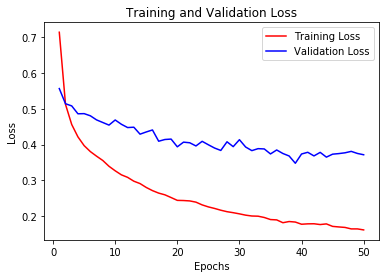

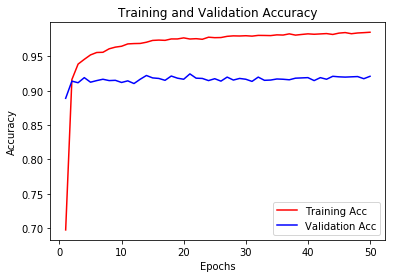

In [44]:
evaluate(dnn_uni, hist_uni, test_uni, 'DNN Unigram')

DNN Unigram-Tfidf Evaluation: 
Accuracy:        0.9088074824629774
ROC AUC Score:   0.9070328362133185
F1 Score:        0.9008474576271187
Precision:       0.9390459363957597
Recall:          0.8656351791530945


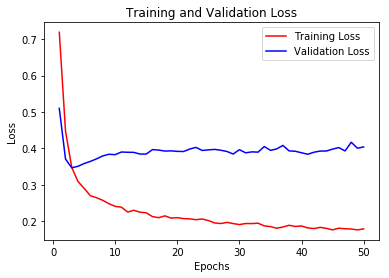

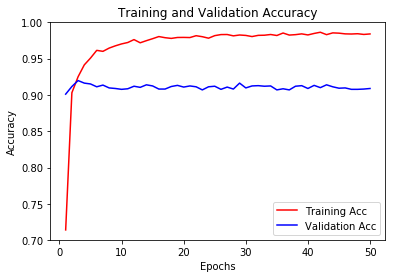

In [45]:
evaluate(dnn_tfu, hist_tfu, test_tfu, 'DNN Unigram-Tfidf')

DNN Bigram Evaluation: 
Accuracy:        0.7751363990646921
ROC AUC Score:   0.7698184611189826
F1 Score:        0.7332408691631992
Precision:       0.8481283422459893
Recall:          0.6457654723127035


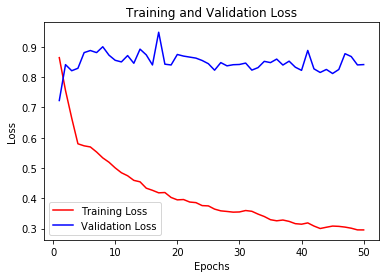

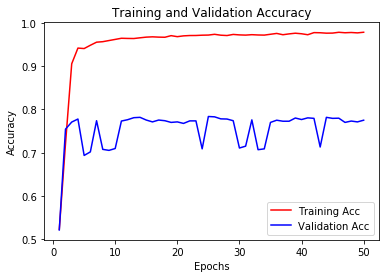

In [46]:
evaluate(dnn_big, hist_big, test_big, 'DNN Bigram')

DNN Bigram-Tfidf Evaluation: 
Accuracy:        0.7751363990646921
ROC AUC Score:   0.7714252153294089
F1 Score:        0.7445772465692784
Precision:       0.8157129000969933
Recall:          0.6848534201954397


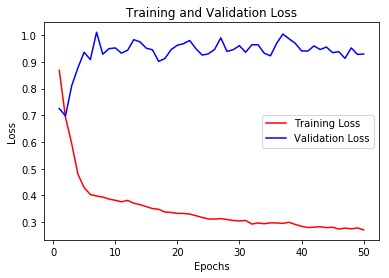

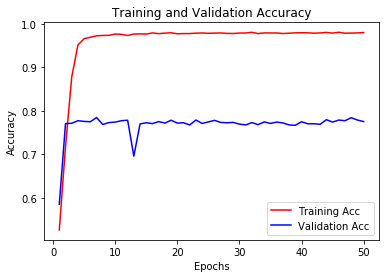

In [47]:
evaluate(dnn_tfb, hist_tfb, test_tfb, 'DNN Bigram-Tfidf')

DNN Reduced Unigram Evaluation: 
Accuracy:        0.6975837879968823
ROC AUC Score:   0.6986002979798718
F1 Score:        0.6956862745098039
Precision:       0.6709531013615734
Recall:          0.7223127035830619


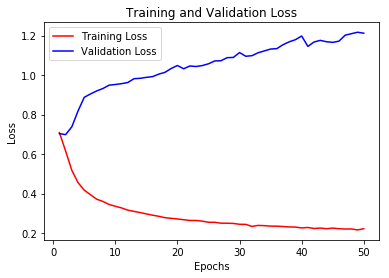

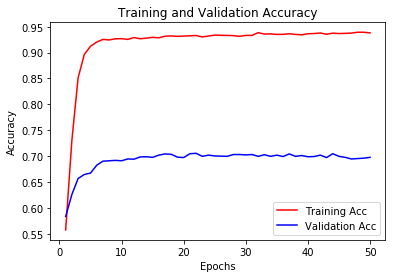

In [48]:
evaluate(dnn_runi, hist_runi, test_runi, 'DNN Reduced Unigram')

DNN Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.5806703039750585
ROC AUC Score:   0.5921163143979784
F1 Score:        0.662272441933459
Precision:       0.5388151174668029
Recall:          0.8591205211726385


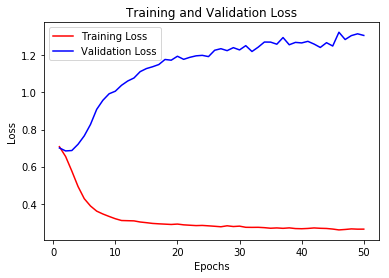

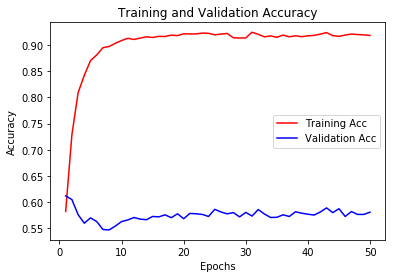

In [49]:
evaluate(dnn_rtfu, hist_rtfu, test_rtfu, 'DNN Reduced Unigram-Tfidf')

DNN Reduced Bigram Evaluation: 
Accuracy:        0.5576773187840998
ROC AUC Score:   0.5520594450368337
F1 Score:        0.4767173812816967
Precision:       0.5494155154091392
Recall:          0.4210097719869707


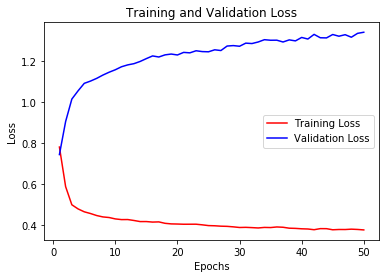

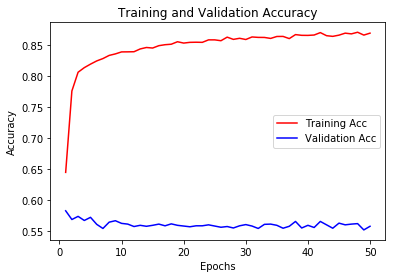

In [50]:
evaluate(dnn_rbig, hist_rbig, test_rbig, 'DNN Reduced Bigram')

DNN Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.5381917381137958
ROC AUC Score:   0.5348142251306096
F1 Score:        0.48590021691973967
Precision:       0.5199628597957289
Recall:          0.4560260586319218


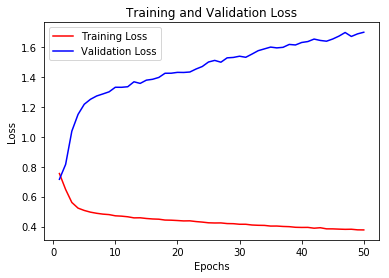

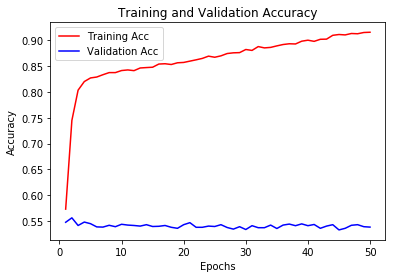

In [51]:
evaluate(dnn_rtfb, hist_rtfb, test_rtfb, 'DNN Reduced Bigram-Tfidf')

# Training Neural Networks - Early Stopping

In [68]:
dnn_uni_s, hist_uni_s = DNN(train_uni, test_uni, early_stop = True)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 200)               1900200   
_________________________________________________________________
dropout_28 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 5         
Total params: 1,913,329
Trainable params: 1,913,329
Non-trainable params: 0
___________________________________________

In [69]:
dnn_tfu_s, hist_tfu_s = DNN(train_tfu, test_tfu, early_stop = True)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 200)               1900200   
_________________________________________________________________
dropout_30 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 5         
Total params: 1,913,329
Trainable params: 1,913,329
Non-trainable params: 0
___________________________________________

In [70]:
dnn_big_s, hist_big_s = DNN(train_big, test_big, early_stop = True)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 500)               21500500  
_________________________________________________________________
dropout_32 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 128)               64128     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_34 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 4)               

In [71]:
dnn_tfb_s, hist_tfb_s = DNN(train_tfb, test_tfb, early_stop = True)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 500)               21500500  
_________________________________________________________________
dropout_35 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               64128     
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_37 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 4)               

In [72]:
dnn_runi_s, hist_runi_s = DNN(train_runi, test_runi, early_stop = True)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 16)                7616      
_________________________________________________________________
dropout_38 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 5         
Total params: 7,689
Trainable params: 7,689
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 35us/sample - loss: 0.6708 - accuracy: 0.6867
Training Time:   2.5343806743621826
Model Loss:      0.6707693397859438
Model Accuracy:  0.68667185


In [73]:
dnn_rtfu_s, hist_rtfu_s = DNN(train_rtfu, test_rtfu, early_stop = True)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 16)                7616      
_________________________________________________________________
dropout_39 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 5         
Total params: 7,689
Trainable params: 7,689
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 38us/sample - loss: 0.7282 - accuracy: 0.5577
Training Time:   2.380988836288452
Model Loss:      0.7282462883813253
Model Accuracy:  0.5576773


In [74]:
dnn_rbig_s, hist_rbig_s = DNN(train_rbig, test_rbig, early_stop = True)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 100)               215100    
_________________________________________________________________
dropout_40 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 17        
Total params: 216,733
Trainable params: 216,733
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 72us/sample - loss: 0.8835 - accuracy: 0.5795
Training Time:   4.168692111968994
Model Loss:      0.8835216919519152
Model Accuracy:  0.57950115


In [75]:
dnn_rtfb_s, hist_rtfb_s = DNN(train_rtfb, test_rtfb, early_stop = True)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 100)               215100    
_________________________________________________________________
dropout_41 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 17        
Total params: 216,733
Trainable params: 216,733
Non-trainable params: 0
_________________________________________________________________
2566/2566 [==============================] - 0s 72us/sample - loss: 0.8422 - accuracy: 0.5456
Training Time:   2.6340010166168213
Model Loss:      0.8421548465825762
Model Accuracy:  0.54559624


# Evaluate Neural Networks - Early Stopping

DNN Early Stop Unigram Evaluation: 
Accuracy:        0.9193296960249415
ROC AUC Score:   0.9174237887264282
F1 Score:        0.9119523606975755
Precision:       0.9545859305431879
Recall:          0.8729641693811075


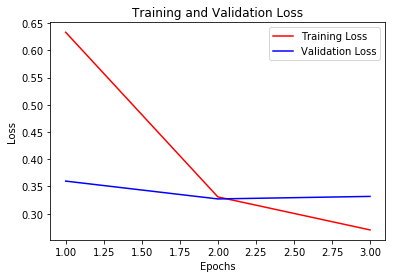

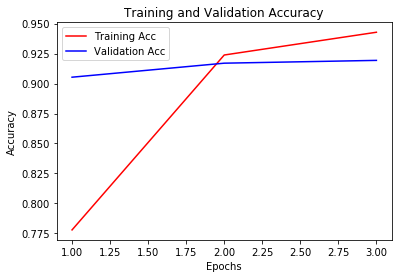

In [76]:
evaluate(dnn_uni_s, hist_uni_s, test_uni, 'DNN Early Stop Unigram')

DNN Early Stop Unigram-Tfidf Evaluation: 
Accuracy:        0.9150428682774747
ROC AUC Score:   0.9142504491608361
F1 Score:        0.9098428453267163
Precision:       0.9243697478991597
Recall:          0.8957654723127035


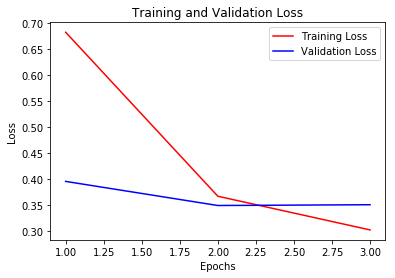

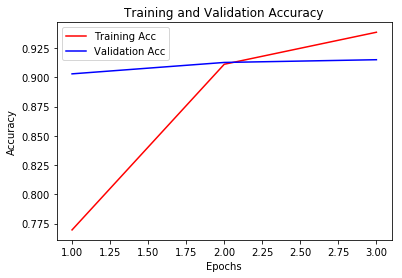

In [77]:
evaluate(dnn_tfu_s, hist_tfu_s, test_tfu, 'DNN Early Stop Unigram-Tfidf')

DNN Early Stop Bigram Evaluation: 
Accuracy:        0.779423226812159
ROC AUC Score:   0.7744311846647483
F1 Score:        0.7406049495875344
Precision:       0.8469601677148847
Recall:          0.6579804560260586


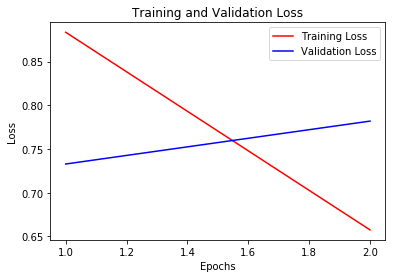

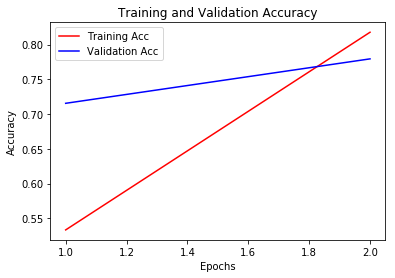

In [78]:
evaluate(dnn_big_s, hist_big_s, test_big, 'DNN Early Stop Bigram')

DNN Early Stop Bigram-Tfidf Evaluation: 
Accuracy:        0.7837100545596258
ROC AUC Score:   0.7804163440985865
F1 Score:        0.7568988173455979
Precision:       0.818957345971564
Recall:          0.7035830618892508


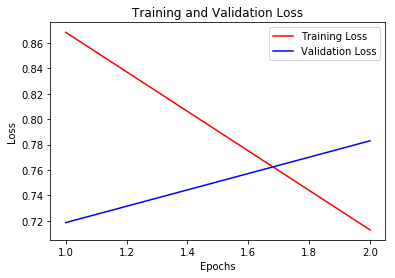

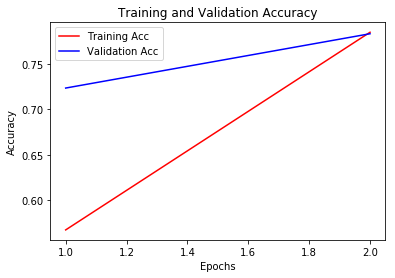

In [79]:
evaluate(dnn_tfb_s, hist_tfb_s, test_tfb, 'DNN Early Stop Bigram-Tfidf')

DNN Early Stop Reduced Unigram Evaluation: 
Accuracy:        0.686671862821512
ROC AUC Score:   0.688438186217944
F1 Score:        0.6902927580893683
Precision:       0.6549707602339181
Recall:          0.7296416938110749


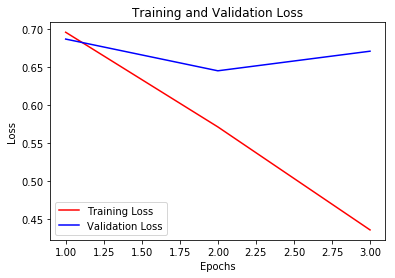

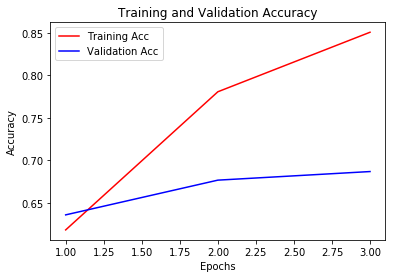

In [80]:
evaluate(dnn_runi_s, hist_runi_s, test_runi, 'DNN Early Stop Reduced Unigram')

DNN Early Stop Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.5576773187840998
ROC AUC Score:   0.5660181222399128
F1 Score:        0.622044622044622
Precision:       0.5261971830985915
Recall:          0.760586319218241


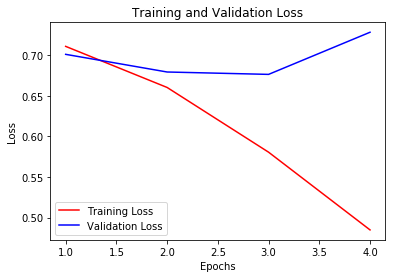

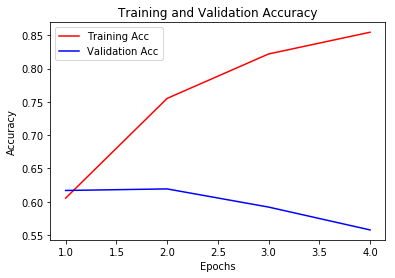

In [81]:
evaluate(dnn_rtfu_s, hist_rtfu_s, test_rtfu, 'DNN Early Stop Reduced Unigram-Tfidf')

DNN Early Stop Reduced Bigram Evaluation: 
Accuracy:        0.5795011691348402
ROC AUC Score:   0.568668049449078
F1 Score:        0.41832884097035045
Precision:       0.6188197767145136
Recall:          0.31596091205211724


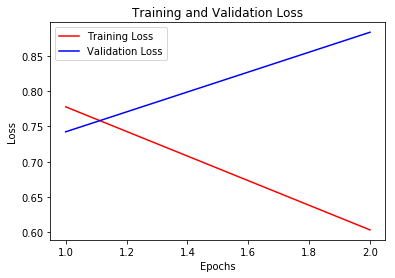

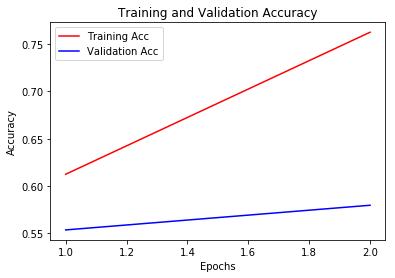

In [82]:
evaluate(dnn_rbig_s, hist_rbig_s, test_rbig, 'DNN Early Stop Reduced Bigram')

DNN Early Stop Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.5455962587685113
ROC AUC Score:   0.5398055097062562
F1 Score:        0.46018518518518514
Precision:       0.5332618025751072
Recall:          0.40472312703583063


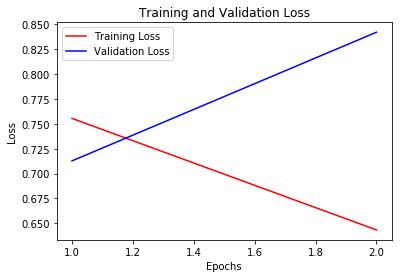

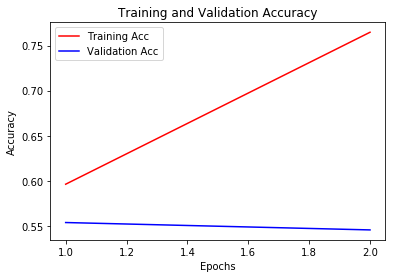

In [83]:
evaluate(dnn_rtfb_s, hist_rtfb_s, test_rtfb, 'DNN Early Stop Reduced Bigram-Tfidf')